#### Lets Analyze the data 

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
# Display settings for pandas
pd.set_option('display.max_columns', None) # this will show all columns when printing a DataFrame

In [194]:
# Display settings for seaborn
sns.set_style("whitegrid") # this will set the style for seaborn plots

In [195]:
df=pd.read_csv("german_credit_data.csv")

In [196]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [197]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [198]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [199]:
df["Risk"].value_counts() #good -> less risk , bad -> high risk

Risk
good    700
bad     300
Name: count, dtype: int64

In [200]:
df.shape # 1000 rows and 20 columns

(1000, 11)

In [201]:
df.info() # here we see we have null values in savings accounts and checking accounts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [202]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [203]:
df.describe(include='all').T # this will give statistical summary of all columns including categorical ones

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
df["Job"].unique() # this will give unique values in Job column
# this job 1,2,3 means 0=very low job  1=lower job , 2=middle job ,3=high job

array([2, 1, 3, 0])

In [205]:
df.isna().sum() # this will give count of null values in each column

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

#### here we see that two very imp columns saving accounts and checking accounts have very much null values 

In [206]:
df["Saving accounts"].unique() # this will give unique values in saving accounts column

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [207]:
df["Checking account"].unique() # this will give unique values in checking account column

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [208]:
df.duplicated().sum() # this will give count of duplicate rows in the dataset # 0 no duplicated rows found 

np.int64(0)

In [209]:
df=df.dropna().reset_index(drop=True)  # dropping null values and resetting index

# Here we drop null values because we nulls values are in the columns which are categorical and filling nulls with mode may lead to data distortion

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        522 non-null    int64 
 1   Age               522 non-null    int64 
 2   Sex               522 non-null    object
 3   Job               522 non-null    int64 
 4   Housing           522 non-null    object
 5   Saving accounts   522 non-null    object
 6   Checking account  522 non-null    object
 7   Credit amount     522 non-null    int64 
 8   Duration          522 non-null    int64 
 9   Purpose           522 non-null    object
 10  Risk              522 non-null    object
dtypes: int64(5), object(6)
memory usage: 45.0+ KB


In [211]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad


In [212]:
df.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [213]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad


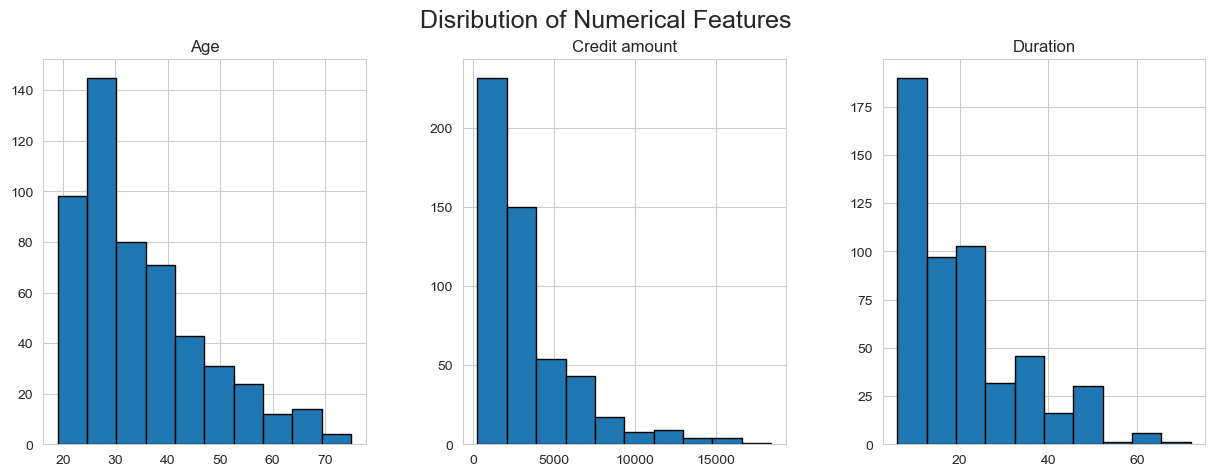

In [214]:
# Now we create an histogram for numerical columns to see their distribution
df[["Age","Credit amount","Duration"]].hist(bins=10, figsize=(15,5),edgecolor="Black", layout=(1,3))
plt.suptitle("Disribution of Numerical Features", fontsize=18)
plt.grid(True)
plt.show()

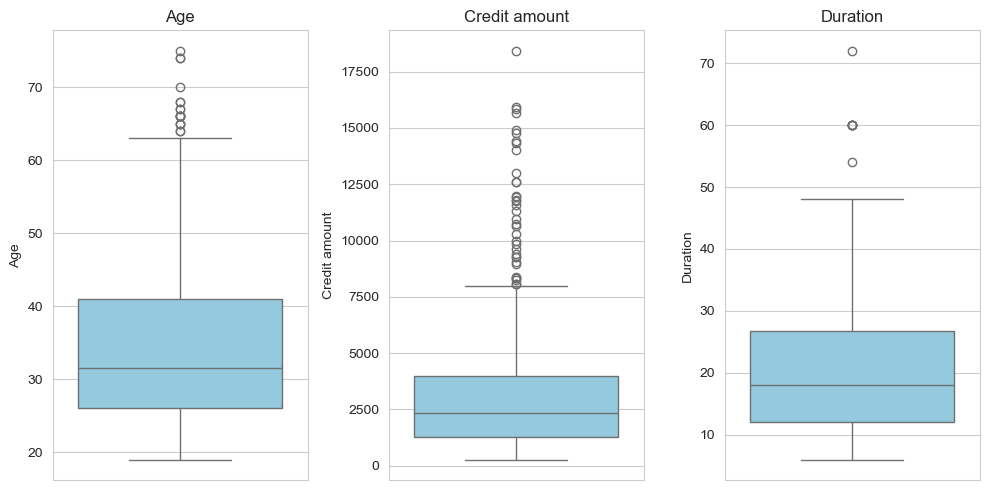

In [215]:
plt.figure(figsize=(10, 5))  # Sets the overall width (10) and height (5) of the plotting area
for i, col in enumerate(["Age", "Credit amount", "Duration"]):  # Loops through columns while tracking the index (i)
    plt.subplot(1, 3, i + 1)  # Creates a grid of 1 row and 3 columns, selecting the i+1 position
    sns.boxplot(y = df[col], color = "skyblue")  # Draws a vertical boxplot for the current column in sky blue
    plt.title(col)  # Adds the column name as a header above the individual subplot

plt.tight_layout()  # Adjusts spacing automatically to prevent labels and subplots from overlapping
plt.show()  # Renders the final set of plots on the screen

In [216]:
df.query("Duration >70") # to see rows where duration is greater than 70

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [217]:
df.query("Duration >=60") # to see rows where duration is greater than or equal to 60

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [218]:
categorical_cols = ['Sex', "Job",'Housing', 'Saving accounts', 'Checking account', 'Purpose']

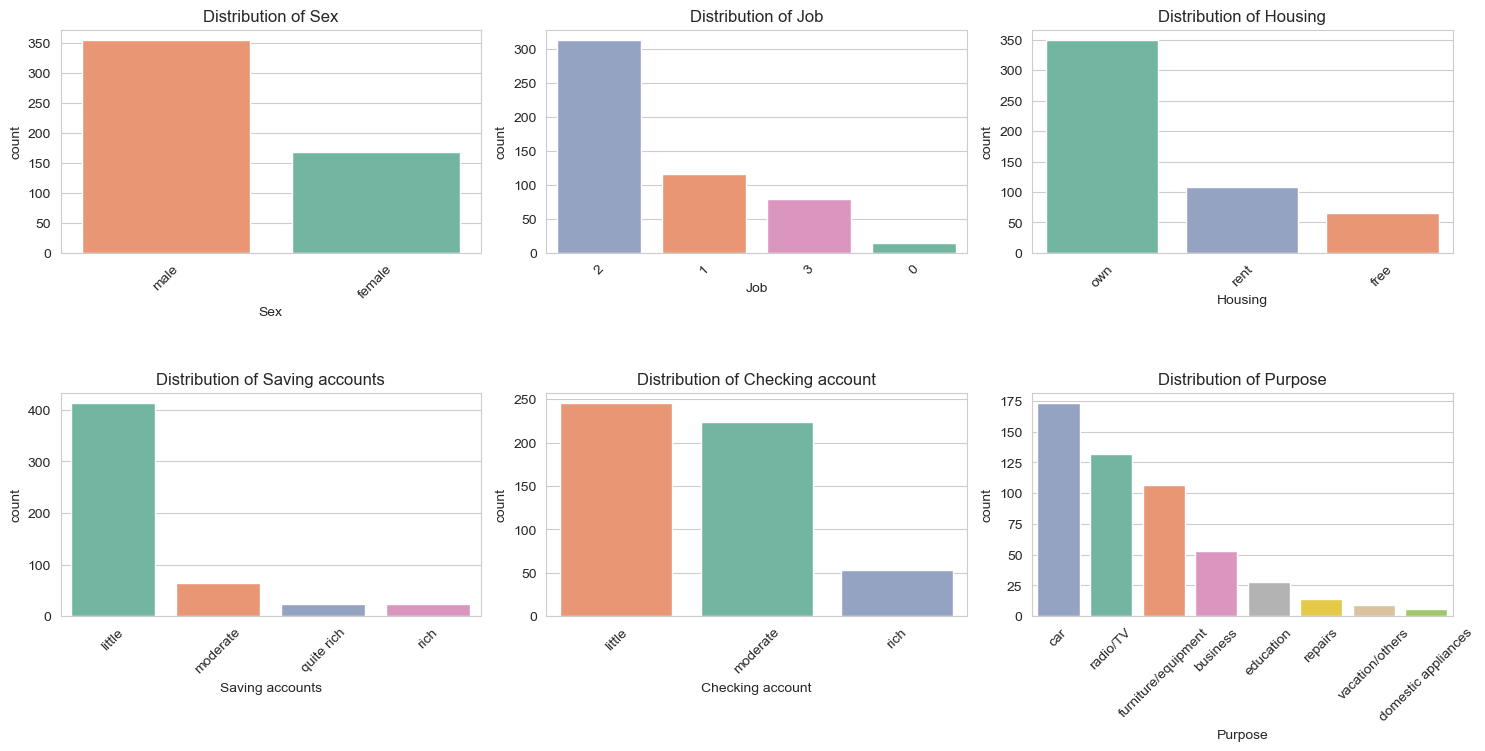

In [219]:
# Creating Plots for Categorical Features

plt.figure(figsize=(15,10))  # Sets the overall figure size to 15x10 inches
for i, col in enumerate(categorical_cols):  # Loops through each categorical column name
    plt.subplot(3, 3, i + 1)  # Sets up a 3x3 grid for multiple plots
    # FIX: Assigned x to hue and added legend=False to satisfy new Seaborn requirements
    sns.countplot(data=df, x=col, hue=col, palette="Set2", legend=False, order=df[col].value_counts().index) 
    plt.title(f"Distribution of {col}")  # Titles each subplot dynamically
    plt.xticks(rotation=45)  # Rotates labels to prevent overlapping

plt.tight_layout()  # Optimizes spacing between subplots
plt.show()  # Renders the final figure


 - The Warning: Seaborn is moving toward a standard where palette is specifically used to map colors to a semantic "hue" variable. 
 Even if your x and hue are the same column, the library now requires you to be explicit.
 - legend=False: When you define a hue, Seaborn automatically adds a legend. Since your x axis already labels the categories, 
 a legend is redundant and would clutter your 3x3 grid of plots. Setting legend=False prevents this automatic addition.
 

In [220]:
#Correlation Matrix 
corr = df[["Age","Job","Credit amount","Duration"]].corr()

In [221]:
corr # this will show correlation values between numerical columns 
# means how strongly numerical columns are related to each other

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


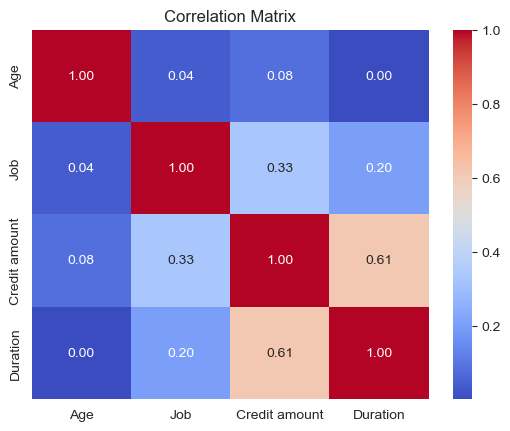

In [222]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")  # Creates a heatmap with annotations and a color gradient    
plt.title("Correlation Matrix")  # Sets the title of the heatmap
plt.show()  # Displays the heatmap

In [223]:
# from the correlation matrix we see that credit amount and duration have a strong positive correlation of 0.69
# IF credit amount increases duration also increases and vice versa

In [224]:
df.groupby("Job")["Credit amount"].mean() # to see average credit amount for each job type

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [225]:
df.groupby("Sex")["Credit amount"].mean() # to see average credit amount for each sex

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [226]:
pd.pivot_table(df, values="Credit amount", index="Housing", columns="Purpose")
#This pivot table shows average credit amount for each housing type based on purpose of loan

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


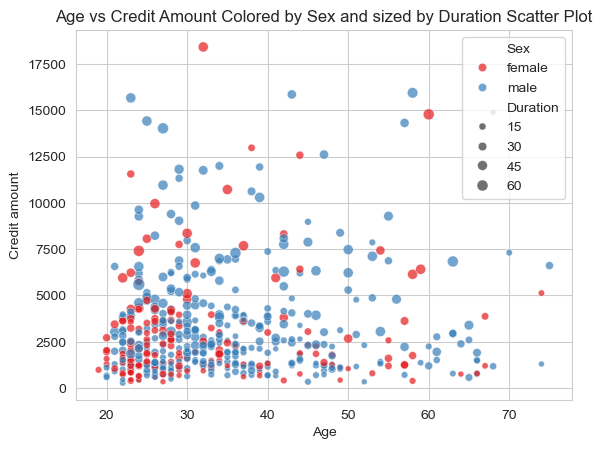

In [227]:
# Here we create a scatter plot to see relationship between age and credit amount
sns.scatterplot(data=df, x="Age", y="Credit amount", hue="Sex", size="Duration",alpha=0.7, palette="Set1") 
plt.title("Age vs Credit Amount Colored by Sex and sized by Duration Scatter Plot")  # Adds a title to the scatter plot
plt.show()

In [228]:
# Insights from the analysis:
# 1. Most of the applicants are in age group of 20-40
# 2. Majority of the applicants have credit amount between 2000 to 6000

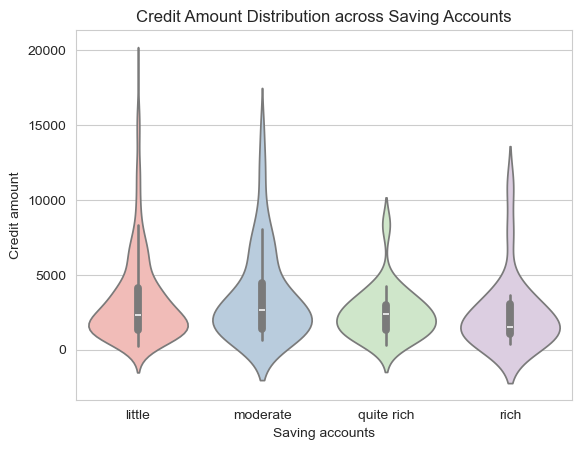

In [229]:
sns.violinplot(data=df,x="Saving accounts",y="Credit amount",palette="Pastel1" , hue="Saving accounts",legend=False)
plt.title("Credit Amount Distribution across Saving Accounts")  # Adds a title to the violin plot
plt.show()

In [230]:
# INFERENCE:
# 1. From the violin plot we see that people with little savings have taken higher credit amounts

In [231]:
df["Risk"].value_counts(normalize=True) *100
# normalize=True gives proportions instead of counts
# This shows that 55.7% of applicants are good risk and 44.2% are bad risk

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

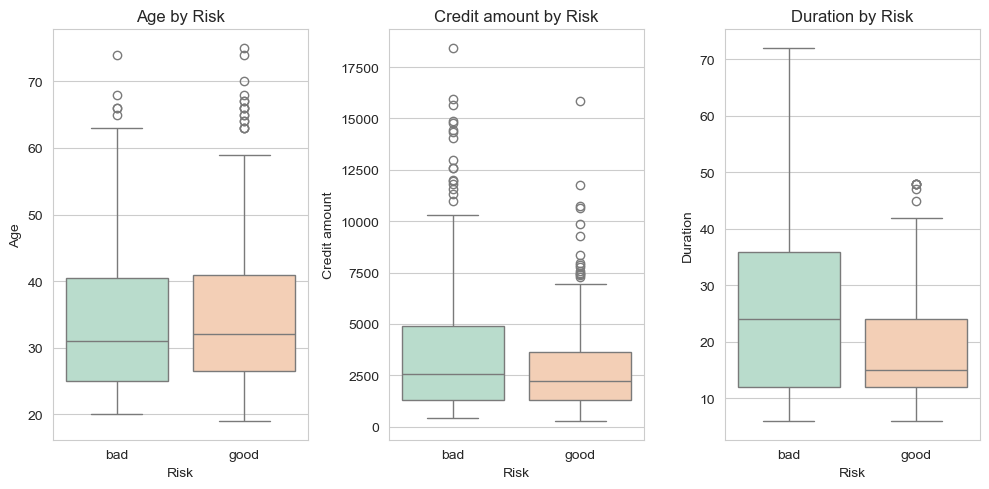

In [232]:
plt.figure(figsize=(10,5))
for i , col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3, i+1)
    sns.boxplot(data=df , x = "Risk", y= col , palette="Pastel2" , hue="Risk" , legend=False) # boxplot to see distribution of numerical columns based on risk category # palette means color scheme
    plt.title(f"{col} by Risk")  # Adds title to each subplot
plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()

In [233]:
# Insights from the analysis:
# 1. Most of the applicants are in age group of 20-40
# 2. Majority of the applicants have credit amount between 2000 to 6000
# 3. Good risk applicants generally have lower credit amounts and shorter durations compared to bad risk applicants
# 4. Age does not seem to have a significant impact on risk category as both good and bad risk applicants are spread across all age groups

In [234]:
# Here we see average values of numerical columns based on risk category
df.groupby("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [235]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

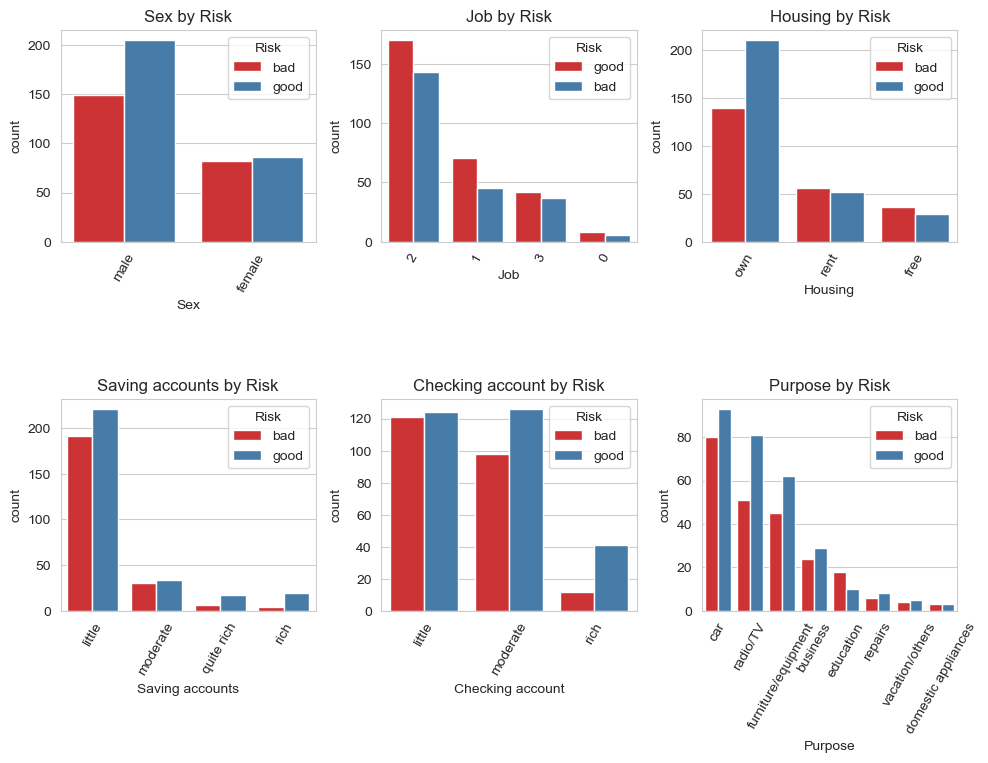

In [236]:
plt.figure(figsize = (10, 10))  # Sets the total canvas size to a square 10x10 inches to fit multiple rows
for i, col in enumerate(categorical_cols):  # Loops through each category name and assigns an index (i)
    plt.subplot(3, 3, i + 1)  # Divides the figure into a 3-row, 3-column grid and selects the current slot
    sns.countplot(data = df, x = col, hue = "Risk", palette = "Set1", order = df[col].value_counts().index)  # Creates bars split by 'Risk' (good/bad) and sorted by total frequency
    plt.title(f"{col} by Risk")  # Sets a specific title for each plot showing the relationship with Risk
    plt.xticks(rotation=60)  # Tilts the labels on the x-axis to 45 degrees so they are easier to read

plt.tight_layout()  # Automatically adjusts the padding between subplots to prevent overlapping text
plt.show()  # Displays the final grid of charts on the screen

In [237]:
# INSIGHTS:
# 1. Majority of good risk applicants have higher savings and checking accounts compared to bad risk applicants
# 2. Good risk applicants are more likely to have their own housing compared to bad risk applicants
# 3. Purpose of loan also varies between good and bad risk applicants, with good risk applicants more likely to take loans for car and furniture purchases

### Now we Begain for model building 

In [238]:
# These are input features for our model
features = ['Age','Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount','Duration']

In [239]:
# This is Predicted target variable
target="Risk"

In [240]:
# features = ['Age','Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount','Duration']
df_model = df[features + [target]].copy()

In [241]:
df_model

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad
...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,good
518,30,male,3,own,little,little,3959,36,good
519,40,male,3,own,little,little,3857,30,good
520,23,male,2,free,little,little,1845,45,bad


#### Pre-Procesing

- Note = Here we go with only Tree based model so for them no scaling is needed 

In [242]:
from sklearn.preprocessing import LabelEncoder # Label Encoder is used to convert categorical variables into numerical format
import joblib # joblib is used to save the trained model for future use


In [243]:
cat_cols = df_model.select_dtypes(include = "object").columns.drop("Risk")  # Identifies all text-based columns and removes the 'Risk' target variable from the list
le_dict = {}  # Initializes an empty dictionary to store LabelEncoders for later use in decoding values
cat_cols  # Displays the final list of selected categorical column names (Sex, Housing, Saving accounts, etc.)

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [244]:
for col in cat_cols:  # Starts a loop to process each categorical column identified earlier
    le = LabelEncoder()  # Creates a new instance of the LabelEncoder for the current column
    df_model[col] = le.fit_transform(df_model[col])  # Learns the categories and converts them into integers (0, 1, 2...)
    le_dict[col] = le  # Saves the trained encoder into your dictionary to use for future data decoding
    joblib.dump(le, f"{col}_encoder.pkl")  # Saves the encoder as a physical file so you can reload it in a different script

In [245]:
le_target = LabelEncoder()  # Creates a specific encoder instance dedicated solely to the target variable

In [246]:
target  # Displays the value of the variable 'target' to confirm it is set to 'Risk'

'Risk'

In [247]:
df_model[target] = le_target.fit_transform(df_model[target])  # Transforms the 'good'/'bad' text into 0s and 1s within the dataframe
df_model[target]  # Displays the column again to verify that the labels have been successfully converted to numbers

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [248]:
df_model[target].value_counts()  # Counts how many 0s and 1s are present after the encoding process

Risk
1    291
0    231
Name: count, dtype: int64

In [249]:
joblib.dump(le_target, "target_encoder.pkl")  # Saves the target variable encoder for future use

['target_encoder.pkl']

In [250]:
df.head() 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad


In [251]:
df_model.head() # Now all categorical columns are converted to numerical format

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [252]:
# Now we Split the data in the tarining and testing sets
from sklearn.model_selection import train_test_split  # Imports the utility to split data into training and testing sets
X = df_model.drop(target, axis = 1)  # Creates the feature matrix (X) by removing the 'Risk' column from the dataframe
y = df_model[target]  # Creates the target vector (y) containing only the encoded 'Risk' values (0s and 1s)

In [253]:
X # ALL input features for the model

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [254]:
y # Target variable (Risk)

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [255]:
# Splits data into training (80%) and testing (20%) sets while maintaining the original balance of 'Risk' categories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1) 

In [256]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((417, 8), (105, 8), (417,), (105,))

In [257]:
from sklearn.tree import DecisionTreeClassifier  # Imports a model that makes predictions by splitting data into a flowchart-like tree structure
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier  # Imports "ensemble" models that combine multiple trees to improve accuracy and reduce errors
from xgboost import XGBClassifier  # Imports a high-performance, boosted tree model known for winning data science competitions
from sklearn.metrics import accuracy_score  # Imports a tool to calculate the percentage of correct predictions the model makes
from sklearn.model_selection import GridSearchCV  # Imports a tool to automatically test different settings (hyperparameters) to find the best version of your model

In [258]:
# Defineing a function to train and evaluate models
# This function automates the process of finding the best settings for a model and evaluating its final performance

In [259]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):  # Defines a function to tune, train, and test any classification model
    grid = GridSearchCV(model, param_grid, cv = 5, scoring = "accuracy", n_jobs= -1)  # Sets up a search for the best parameters using 5-fold cross-validation and all available CPU cores
    grid.fit(X_train, y_train)  # Runs the grid search on the training data to find the optimal parameter combination
    best_model = grid.best_estimator_  # Extracts the specific model version that achieved the highest score during tuning
    y_pred = best_model.predict(X_test)  # Uses the optimized model to make predictions on the unseen testing data
    acc = accuracy_score(y_test, y_pred)  # Compares the predictions to the actual results to calculate the final accuracy percentage
    return best_model, acc, grid.best_params_  # Returns the winning model, its accuracy score, and the specific settings used to achieve it

In [260]:
# Decision Tree Classifier

dt = DecisionTreeClassifier(random_state = 1, class_weight = "balanced")  # Initializes the model with a fixed seed for reproducibility and weights to handle imbalanced data

dt_param_grid = {  # Defines a dictionary of settings to test to find the most accurate tree structure
    "max_depth" : [3,5,7,10, None],  # Tests different limits on how deep the tree can grow to prevent overfitting
    "min_samples_split" : [2,5,10],  # Sets the minimum number of data points required to split a node further
    "min_samples_leaf" : [1,2,4]  # Sets the minimum number of data points that must be present in a final leaf node
}

best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)  # Calls your custom function to find the best settings and evaluate the model

print("Decision Tree Accuracy", acc_dt)  # Outputs the final accuracy percentage achieved on the testing data
print("Best parameters", params_dt)  # Prints the specific combination of settings (depth, leaf size, etc.) that performed best

Decision Tree Accuracy 0.580952380952381
Best parameters {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [261]:
# Rndom Forest Classifier
rf=RandomForestClassifier(random_state=1,class_weight="balanced", n_jobs=-1)  # Initializes the Random Forest model with a fixed seed and balanced class weights and no. of jobs to -1 to use all processors

rf_param_grid = {  # Defines a dictionary of hyperparameters to test for the Random Forest model
    "n_estimators": [100, 200],  # Tests how many individual decision trees (100 or 200) should be in the "forest"
    "max_depth" : [5, 7, 10, None],  # Experiments with different depth limits to find the best balance of detail
    "min_samples_split" : [2, 5, 10],  # Sets the minimum data points required to split a node within each tree
    "min_samples_leaf" : [1, 2, 4]  # Sets the minimum data points allowed in the final leaf of any tree
}

# Calls the training function to find the best Random Forest version and evaluate it
best_rf,acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test) 

print("Random Forest Accuracy", acc_rf)  # Displays the final accuracy score on the test data (approx. 61.9%)
print("Best params", params_rf)  # Outputs the specific settings that led to the highest accuracy

Random Forest Accuracy 0.6190476190476191
Best params {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [262]:
# Extra Trees Classifier
et = ExtraTreesClassifier(random_state = 1, class_weight = "balanced", n_jobs = -1)  # Initializes the model with balanced weights and uses all CPU cores for faster processing

et_param_grid = {  # Defines the search space for the best model settings
    "n_estimators": [100, 200],  # Tests if 100 or 200 trees provide better stability
    "max_depth" : [5, 7, 10, None],  # Experiments with tree depth to capture patterns without overfitting
    "min_samples_split" : [2, 5, 10],  # Minimum number of data points needed to create a new branch
    "min_samples_leaf" : [1, 2, 4]  # Minimum number of data points allowed in the final leaf nodes
}

best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)  # Runs the tuning function to find the optimal version of the Extra Trees model

print("Extra trees accuracy", acc_et)  # Displays the final accuracy on test data (which achieved 66.6%, your highest so far)
print("Best params:", params_et)  # Prints the winning combination of hyperparameters

Extra trees accuracy 0.6476190476190476
Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [263]:
# XGBoost Classifier

# Initializes the XGBoost model with a calculated weight to balance the 'Risk' classes
xgb = XGBClassifier(random_state = 1, scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum(), use_label_encoder = False, eval_metric = "logloss")

xgb_param_grid = {  # Defines the search space for the most powerful ensemble settings
    "n_estimators" : [100, 200],  # Tests the number of sequential boosting rounds
    "max_depth" : [3, 5, 7],  # Controls how complex each individual tree can be
    "learning_rate" : [0.01, 0.1, 0.2],  # Adjusts how much the model corrects itself after each step
    "subsample" : [0.7, 1],  # Uses a random 70% or 100% of data per tree to prevent overfitting
    "colsample_bytree" : [0.7, 1]  # Selects a subset of features for each tree to ensure variety
}

# Executes the tuning function to find the best XGBoost configuration
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

print("XGB accuracy", acc_xgb)  # Displays the final test accuracy (approx. 63.8%)
print("Best params", params_xgb)  # Outputs the optimal settings for your final model

XGB accuracy 0.6761904761904762
Best params {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


c:\Users\INDIA TECHNOLOGY\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:27:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [264]:
# In our model the accuracy of Extra Trees Classifier and XGBoost Classifier is highest 

In [265]:
# here we go with extra trees classifier as our final model


In [ ]:
 best_et.predict(X_test) # this will give the predictions for X_test dataset using the best extra trees classifier model

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
 joblib.dump(best_et,"extra_trees_credit_model.pkl") # Saves the trained Extra Trees model to a file for future use

['extra_trees_credit_model.pkl']

In [268]:
# Here We go with XGBoost Classifier as our final model

In [ ]:
# best_xgb.predict(X_test)  # This will give the predictions for X_test dataset using the XGBoost classifier model

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# joblib.dump(best_xgb,"xgb_credit_model.pkl")  # Saves the trained xgb model to a file for future use

['xgb_credit_model.pkl']

In [ ]:
# Conclusion: 
# 1. By my conclusion Extra Tress Classifier is giving good prediction then XGBoost Classifier
#  btw its accuracy is less than XGBoost Classifier
# But still for my prediction I will go with Extra Trees Classifier model
